In [1]:
import os
import torch
import json
import re
import matplotlib.pyplot as plt
import pandas as pd
from datasets import Dataset
from PIL import Image
import numpy as np
import torchvision.transforms as transforms

In [2]:
# Path to the clients_dataset folder
client_dataset_path = r"/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/data/clients_dataset"
# No. of Clients
num_clients = len([f for f in os.listdir(client_dataset_path) if os.path.isdir(os.path.join(client_dataset_path, f))])
num_clients

10

In [4]:
# List to store the client datasets
client_train_datasets = {}
client_val_dataset = {}

# Loop over each client folder (client_0 to client_9)
for client_id in range(num_clients):
    client_folder = f"client_{client_id}"
    
    train_file = os.path.join(client_dataset_path, client_folder, "train_data.pt")
    val_file = os.path.join(client_dataset_path, client_folder, "val_data.pt")
    
    # Load data for each client
    train_data = torch.load(train_file)
    val_data = torch.load(val_file)
    
    # Create a Dataset for the client
    client_train_datasets[client_folder] = pd.DataFrame({
        'image': [train_data[i]['image'] for i in range(len(train_data))],
        'label': [train_data[i]['label'] for i in range(len(train_data))]
    })
    client_val_dataset[client_folder] = pd.DataFrame({
        'image': [val_data[i]['image'] for i in range(len(val_data))],
        'label': [val_data[i]['label'] for i in range(len(val_data))]
    })

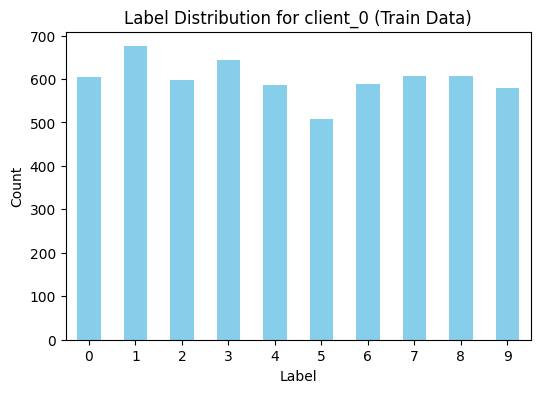

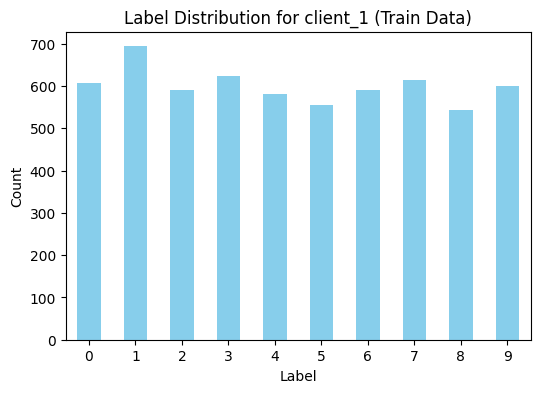

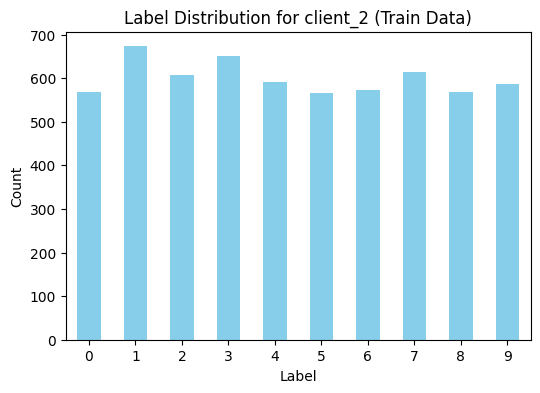

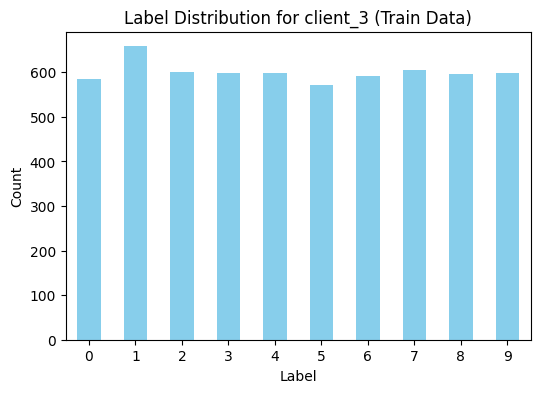

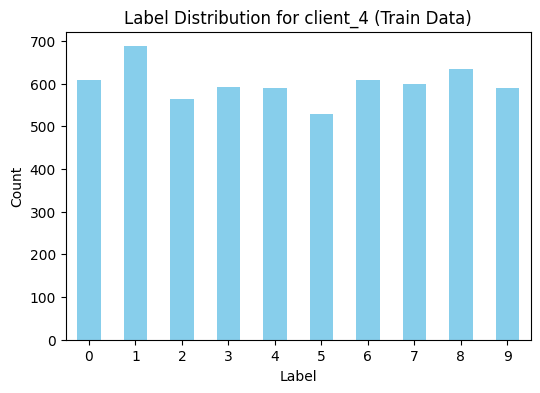

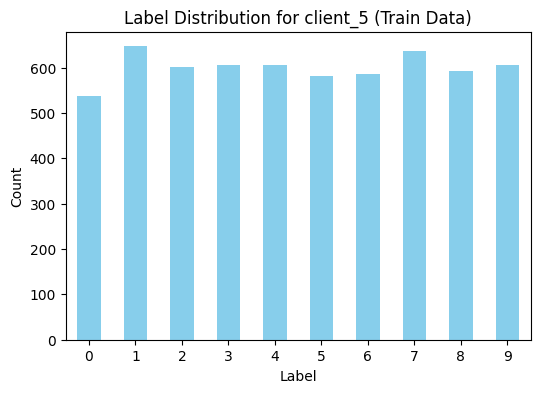

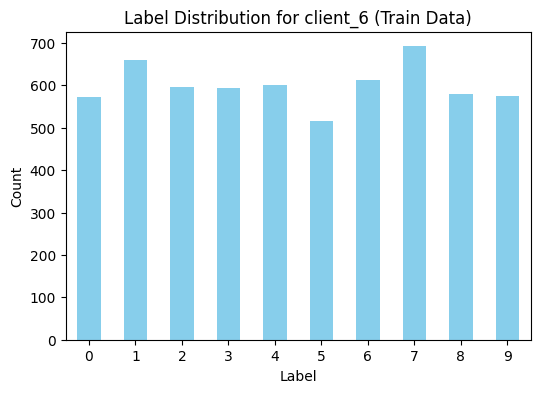

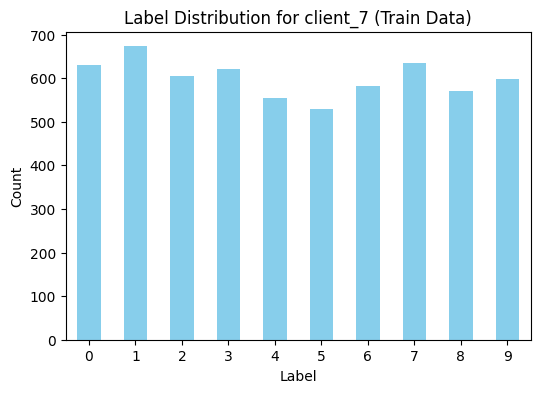

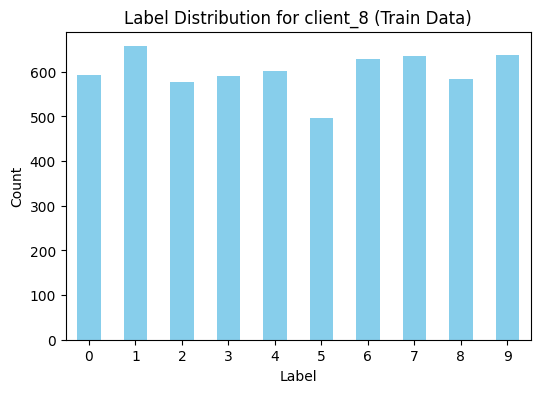

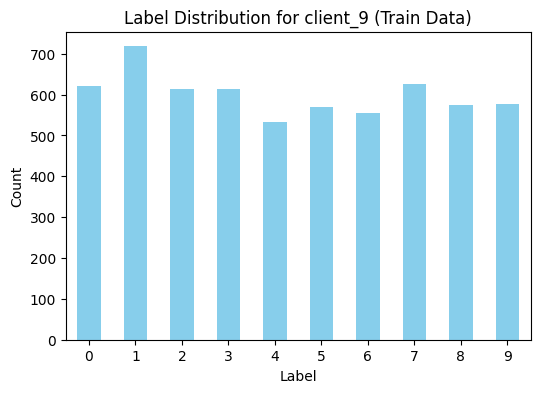

In [5]:
# Now plot the label distribution for each client
for client_folder, train_df in client_train_datasets.items():
    plt.figure(figsize=(6, 4))
    train_df['label'].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Label Distribution for {client_folder} (Train Data)')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

In [5]:
# to_pil = transforms.ToPILImage()
# pil_image = to_pil(df_train.image[0])

# # Show the image
# pil_image.show()

In [6]:
client_train_datasets['client_1'].label.value_counts()

1    694
3    623
7    614
0    607
9    600
2    592
6    590
4    581
5    555
8    544
Name: label, dtype: int64

# Index Validation

In [24]:
drift_client_dataset_path = r"/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/data/clients_drift_dataset_indexes"
json_folder = [f for f in os.listdir(drift_client_dataset_path) if os.path.isdir(os.path.join(drift_client_dataset_path, f))]
num_drifted_clients_json = len(json_folder)
num_drifted_clients_json

3

In [25]:
drift_client_train_json = {}
drift_client_val_json = {}

for folder in json_folder:
    client_folder = folder
    
    train_json_file = os.path.join(drift_client_dataset_path, client_folder, "train_data.json")
    val_json_file = os.path.join(drift_client_dataset_path, client_folder, "val_data.json")
    
    with open(train_json_file, 'r') as file:
        train_indices_list = json.load(file)
    drift_client_train_json[client_folder] = train_indices_list
    with open(val_json_file, 'r') as file:
        val_indices_list = json.load(file)
    drift_client_val_json[client_folder] = val_indices_list

In [26]:
len(drift_client_train_json['client_1'])

1077

In [27]:
len(set(drift_client_train_json['client_1']))

926

In [28]:
len(drift_client_val_json['client_1'])

1075

In [29]:
len(set(drift_client_val_json['client_1']))

412

# Case 1: Client Drifted DataSet

In [30]:
drift_client_dataset_path = r"/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/data/clients_drifted_dataset"
drift_folder = [f for f in os.listdir(drift_client_dataset_path) if os.path.isdir(os.path.join(drift_client_dataset_path, f))]
num_drifted_clients = len(drift_folder)
num_drifted_clients

0

In [14]:
# List to store the client datasets
drift_client_train_datasets = {}
drift_client_val_dataset = {}

# Loop over each client folder (client_0 to client_9)
for folder in drift_folder:
    client_folder = folder
    
    train_file = os.path.join(drift_client_dataset_path, client_folder, "train_data.pt")
    val_file = os.path.join(drift_client_dataset_path, client_folder, "val_data.pt")
    
    # Load data for each client
    train_data = torch.load(train_file)
    val_data = torch.load(val_file)
    
    # Create a Dataset for the client
    drift_client_train_datasets[client_folder] = pd.DataFrame({
        'image': [train_data[i]['image'] for i in range(len(train_data))],
        'label': [train_data[i]['label'] for i in range(len(train_data))]
    })
    drift_client_val_dataset[client_folder] = pd.DataFrame({
        'image': [val_data[i]['image'] for i in range(len(val_data))],
        'label': [val_data[i]['label'] for i in range(len(val_data))]
    })

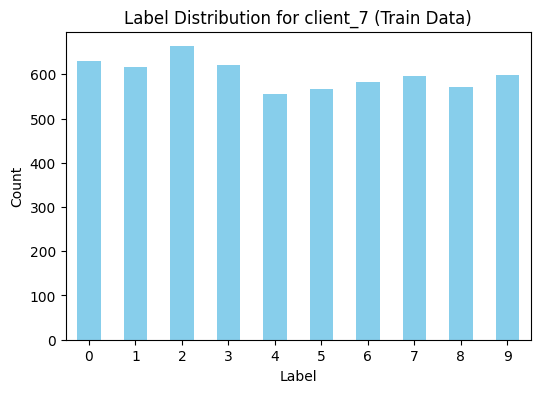

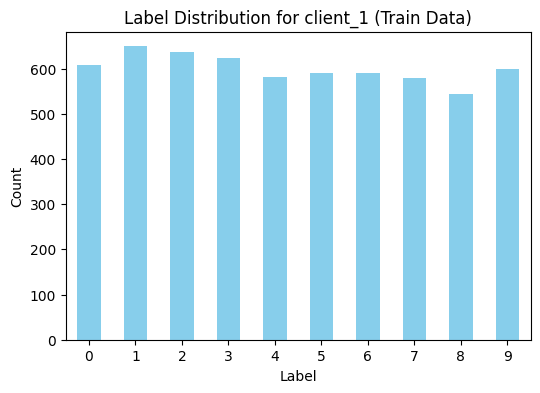

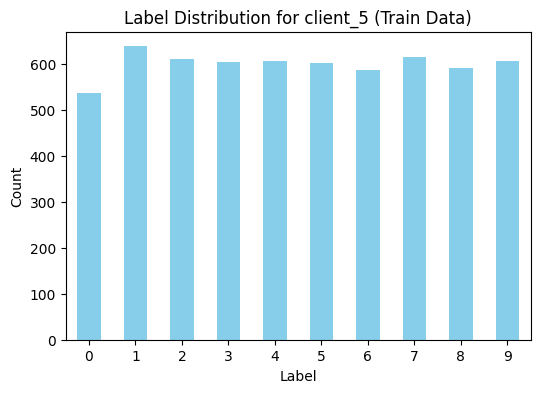

In [15]:
# Now plot the label distribution for each client
for client_folder, train_df in drift_client_train_datasets.items():
    plt.figure(figsize=(6, 4))
    train_df['label'].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Label Distribution for {client_folder} (Train Data)')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

In [16]:
drift_client_train_datasets['client_1'].label.value_counts()

1    649
2    637
3    623
0    607
9    600
5    591
6    590
4    581
7    578
8    544
Name: label, dtype: int64

### Index data and dift data intersection

In [17]:
drift_client_train_datasets['client_1'].iloc[list(dict.fromkeys(drift_client_train_json['client_1']))]

,image,label
1532,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",2
1910,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",5
4533,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",7
2140,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",2
3829,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",7
...,...,...
4452,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",1
5884,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",1
4304,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",1
4006,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",5


In [18]:
drift_client_train_datasets['client_1'].iloc[list(dict.fromkeys(drift_client_train_json['client_1']))].label.value_counts()

2    247
5    221
1    202
7    185
Name: label, dtype: int64

In [19]:
drift_client_train_datasets['client_1']['label'][1910]

5

In [20]:
to_pil = transforms.ToPILImage()
pil_image = to_pil(drift_client_train_datasets['client_1']['image'][1910])

# Show the image
pil_image.show()

# Case 2: Client Remaining Dataset

In [34]:
drift_rem_client_dataset_path = r"/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/data/clients_remaining_dataset"
drift_rem_folder = [f for f in os.listdir(drift_rem_client_dataset_path) if os.path.isdir(os.path.join(drift_rem_client_dataset_path, f))]
num_rem_drifted_clients = len(drift_rem_folder)
num_rem_drifted_clients

3

In [35]:
# List to store the client datasets
drift_rem_client_train_datasets = {}
drift_rem_client_val_dataset = {}

# Loop over each client folder (client_0 to client_9)
for folder in drift_rem_folder:
    client_folder = folder
    
    train_file = os.path.join(drift_rem_client_dataset_path, client_folder, "train_data.pt")
    val_file = os.path.join(drift_rem_client_dataset_path, client_folder, "val_data.pt")
    
    # Load data for each client
    train_data = torch.load(train_file)
    val_data = torch.load(val_file)
    
    # Create a Dataset for the client
    drift_rem_client_train_datasets[client_folder] = pd.DataFrame({
        'image': [train_data[i]['image'] for i in range(len(train_data))],
        'label': [train_data[i]['label'] for i in range(len(train_data))]
    })
    drift_rem_client_val_dataset[client_folder] = pd.DataFrame({
        'image': [val_data[i]['image'] for i in range(len(val_data))],
        'label': [val_data[i]['label'] for i in range(len(val_data))]
    })

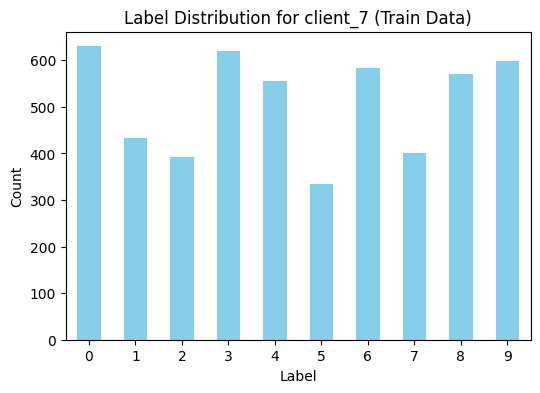

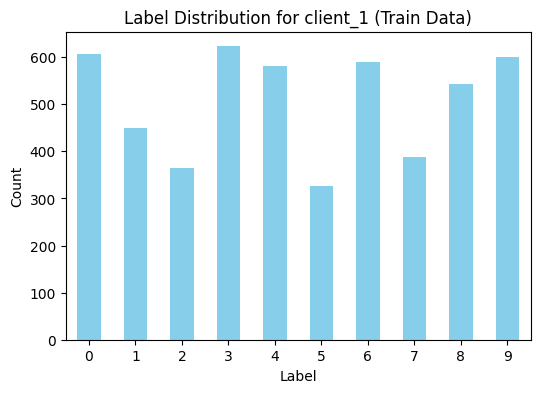

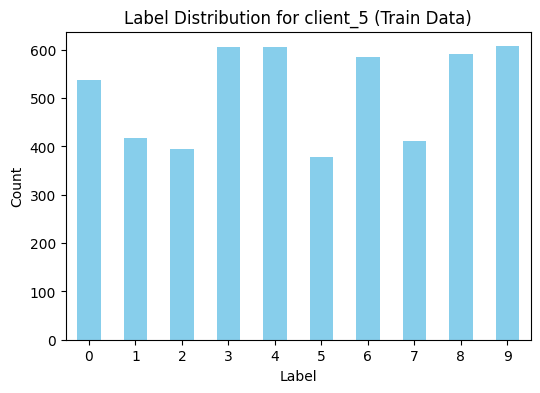

In [36]:
# Now plot the label distribution for each client
for client_folder, train_df in drift_rem_client_train_datasets.items():
    plt.figure(figsize=(6, 4))
    train_df['label'].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Label Distribution for {client_folder} (Train Data)')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

In [37]:
drift_rem_client_train_datasets['client_1'].label.value_counts()

3    623
0    607
9    600
6    590
4    581
8    544
1    450
7    388
2    364
5    327
Name: label, dtype: int64

In [38]:
drift_rem_client_train_datasets['client_1'].shape

(5074, 2)

### Index data and remaning data intersection

In [39]:
drift_rem_set = list(dict.fromkeys(drift_client_val_json['client_1']))
drift_rem_client_val_dataset['client_1'].iloc[drift_rem_set].label.value_counts()

1    133
2    100
7     91
5     88
Name: label, dtype: int64

# Plots

### Local Models 

In [3]:
# Define the path to the log directory
plot_dir = "/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots"

In [4]:
def plot_clients(mode):
    file_path = os.path.join(plot_dir, f"results_{mode}.json")
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Plot Accuracy
    plt.figure(figsize=(10, 5))
    for key, values in data.items():
        plt.plot(range(len(values["accuracy"])), values["accuracy"], marker='o', label=f"Client {key}")

    plt.xlabel("Rounds")
    plt.ylabel("Accuracy")
    plt.title("Client-wise Accuracy over Rounds")
    plt.xticks(range(1, len(next(iter(data.values()))["accuracy"]) + 1)) 
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1)) 
    plt.grid(True)
    plt.show()

    # Plot Loss
    plt.figure(figsize=(10, 5))
    for key, values in data.items():
        plt.plot(range(len(values["loss"])), values["loss"], marker='o', label=f"Client {key}")

    plt.xlabel("Rounds")
    plt.ylabel("Loss")
    plt.title("Client-wise Loss over Rounds")
    plt.xticks(range(1, len(next(iter(data.values()))["loss"]) + 1)) 
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1)) 
    plt.grid(True)
    plt.show()

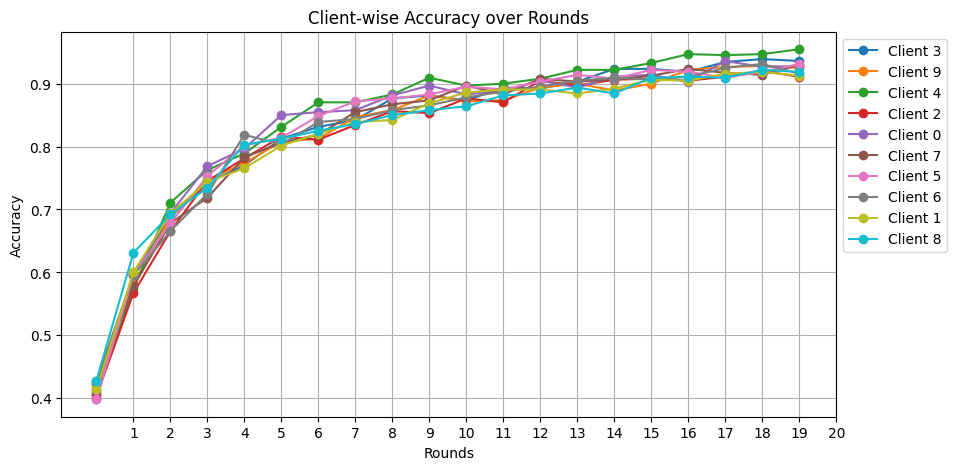

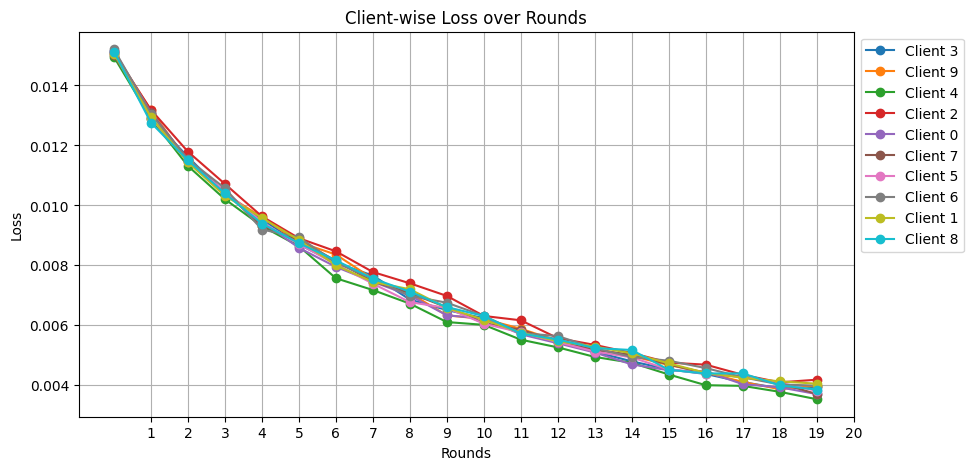

In [8]:
plot_clients("fl-case")

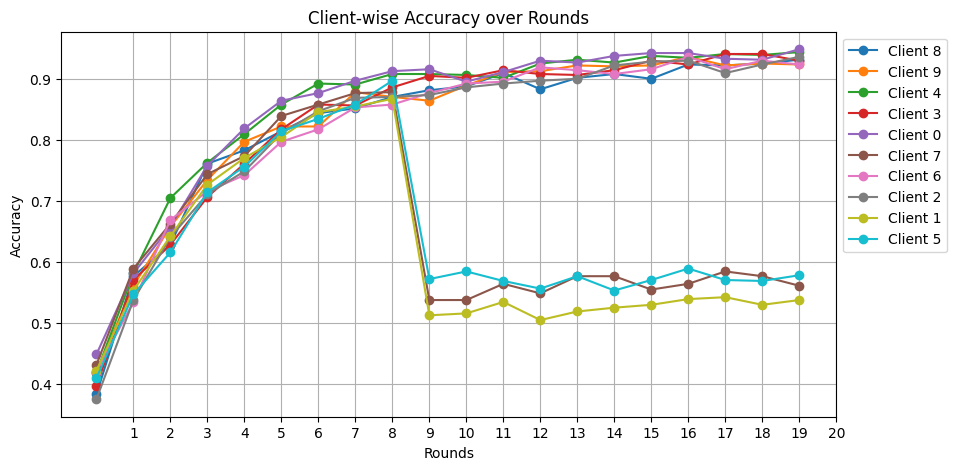

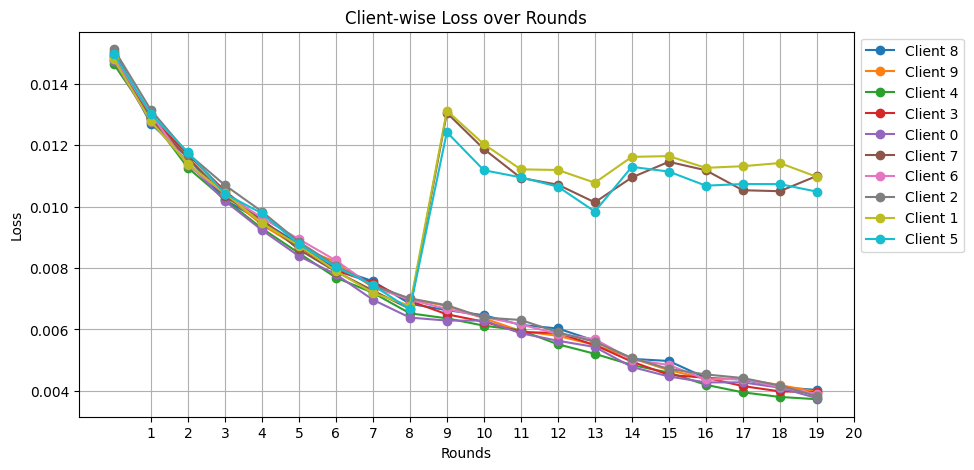

In [105]:
plot_clients("drift-case")

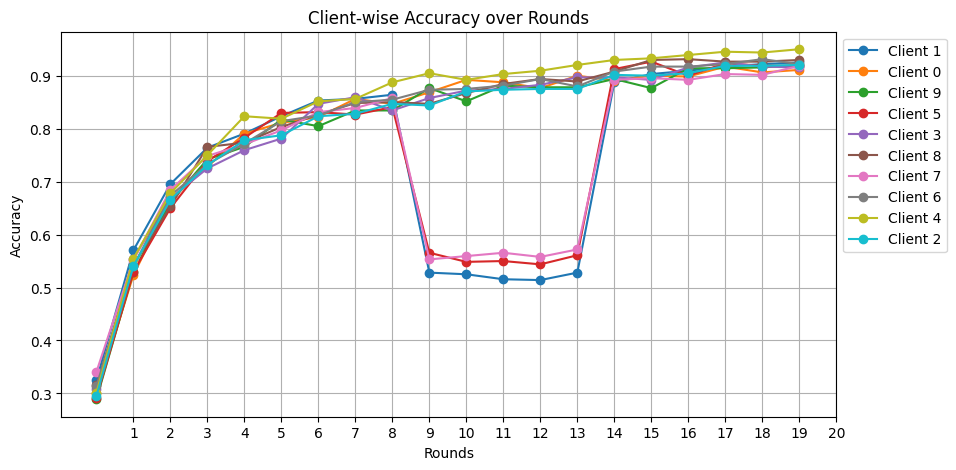

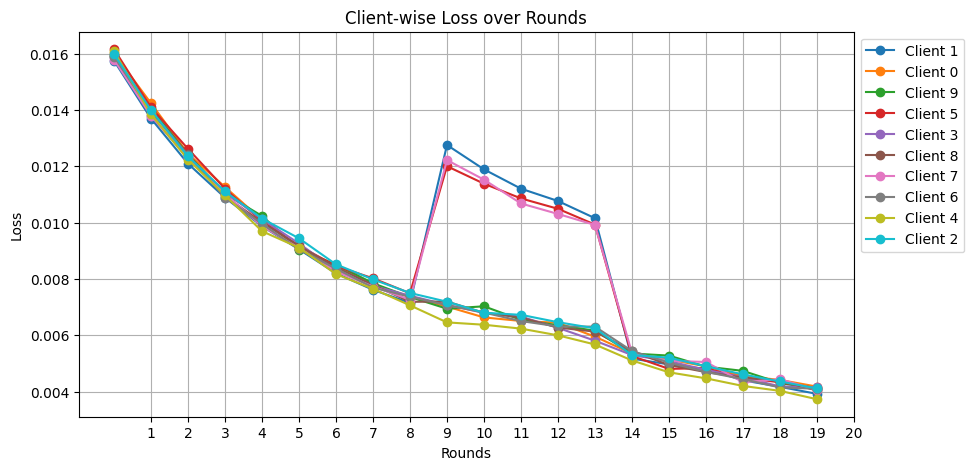

In [106]:
plot_clients("retraining-case")

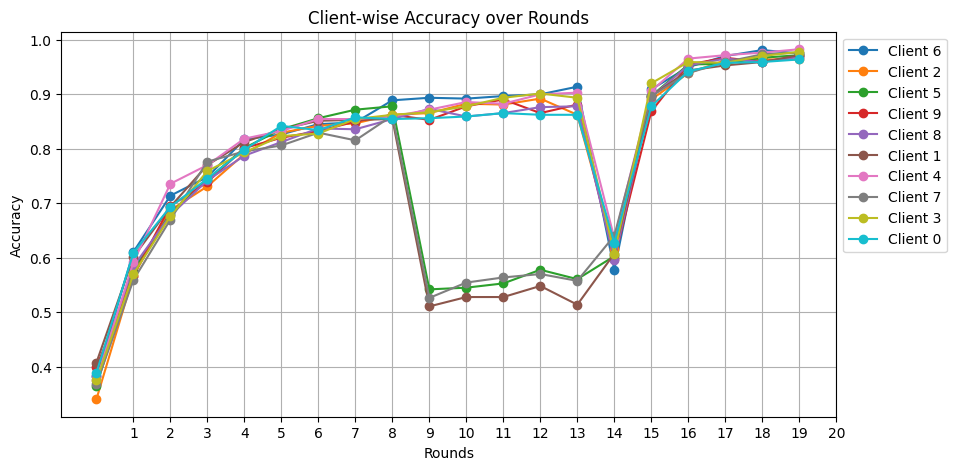

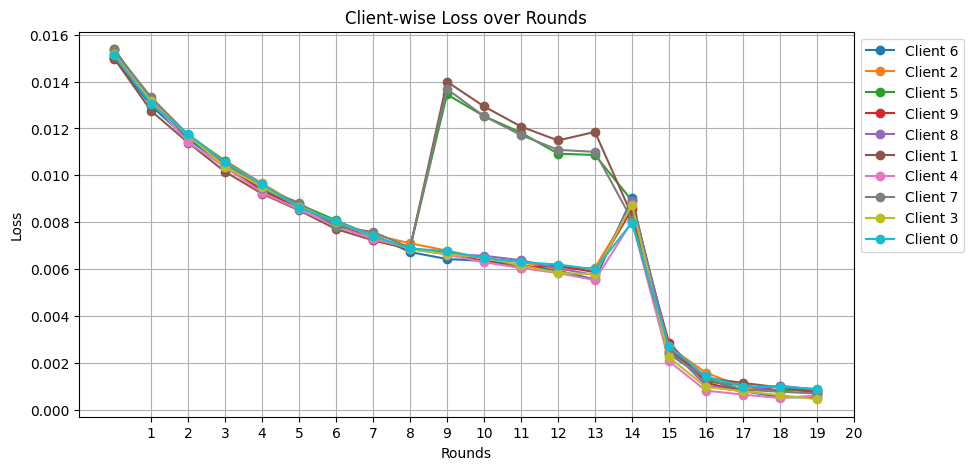

In [107]:
plot_clients("rapid-retraining-case")

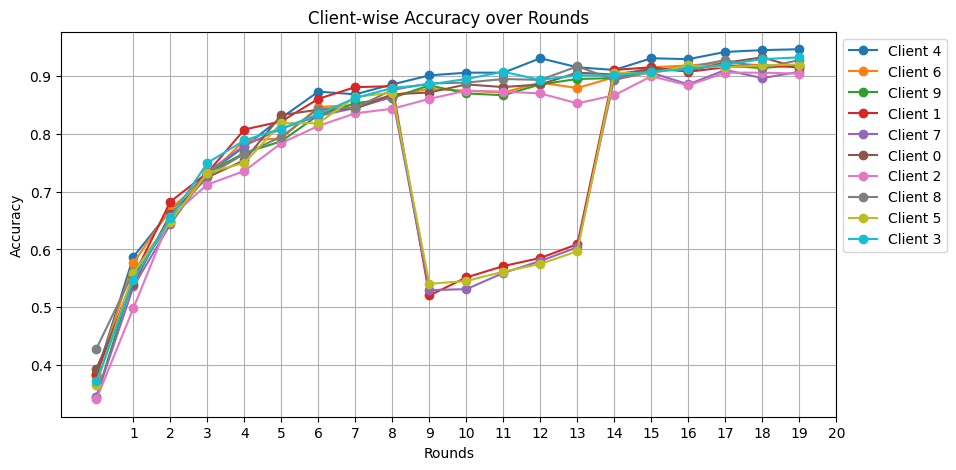

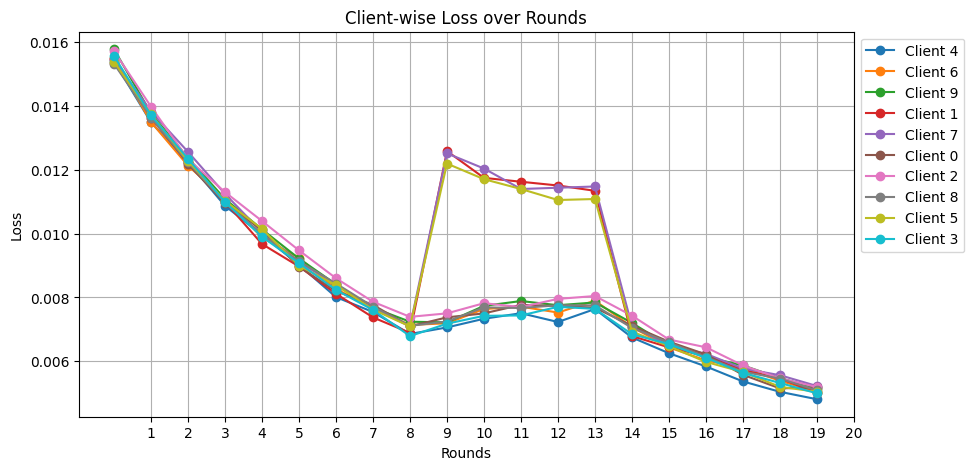

In [22]:
plot_clients("fedau-case")

### Global Model

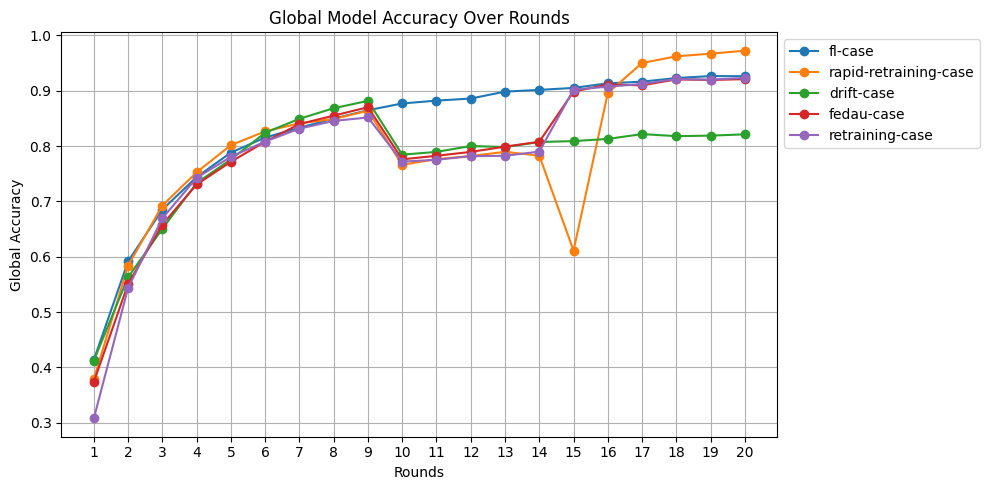

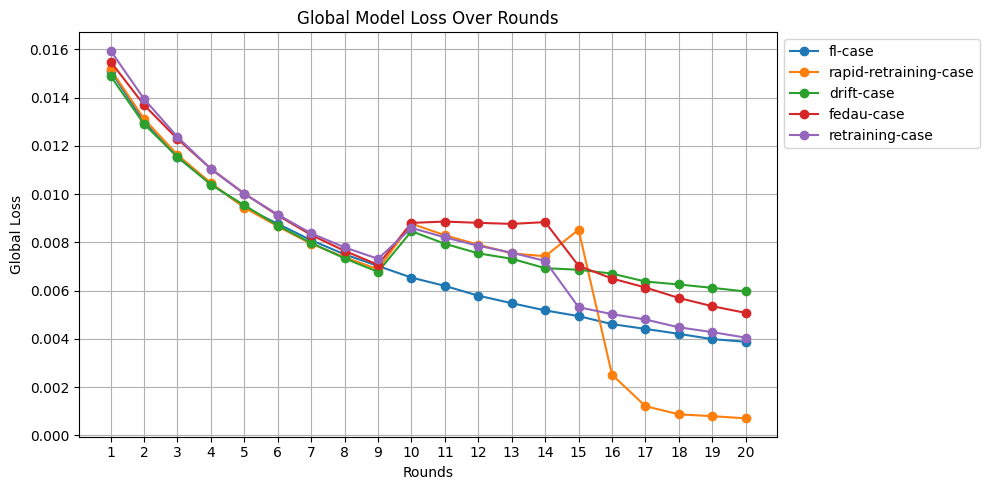

In [23]:
# Get list of all JSON files
json_files = [f for f in os.listdir(plot_dir) if f.endswith(".json")]

# Store global accuracy and loss per file
global_accuracies = []
global_losses = []
labels = []

# Process each JSON file
for file in json_files:
    file_path = os.path.join(plot_dir, file)
    
    # Extract meaningful label from filename
    label = file.replace("results_", "").replace(".json", "")
    labels.append(label)
    
    # Load JSON data
    with open(file_path, "r") as f:
        data = json.load(f)
    
    # Find the number of rounds from any client entry
    num_rounds = len(next(iter(data.values()))["accuracy"])
    
    # Initialize lists to store round-wise accuracy and loss
    round_accuracies = [[] for _ in range(num_rounds)]
    round_losses = [[] for _ in range(num_rounds)]
    
    # Collect accuracy and loss for each round across all clients
    for client_values in data.values():
        for i in range(num_rounds):
            round_accuracies[i].append(client_values["accuracy"][i])
            round_losses[i].append(client_values["loss"][i])
    
    # Compute average accuracy and loss for each round (global model)
    avg_accuracies = [np.mean(round_acc) for round_acc in round_accuracies]
    avg_losses = [np.mean(round_loss) for round_loss in round_losses]
    
    # Store results
    global_accuracies.append(avg_accuracies)
    global_losses.append(avg_losses)

# Plot global accuracy
plt.figure(figsize=(10, 5))
for i, acc in enumerate(global_accuracies):
    plt.plot(range(1, len(acc) + 1), acc, marker='o', label=labels[i]) 
plt.xlabel("Rounds")
plt.ylabel("Global Accuracy")
plt.title("Global Model Accuracy Over Rounds")
plt.xticks(range(1, len(global_accuracies[0]) + 1))  
plt.legend(loc="upper left", bbox_to_anchor=(1, 1)) 
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot global loss
plt.figure(figsize=(10, 5))
for i, loss in enumerate(global_losses):
    plt.plot(range(1, len(loss) + 1), loss, marker='o', label=labels[i])  # Use cleaned labels
plt.xlabel("Rounds")
plt.ylabel("Global Loss")
plt.title("Global Model Loss Over Rounds")
plt.xticks(range(1, len(global_losses[0]) + 1)) 
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()